In this notebook I analyze the computer (level 1) performance against humans. 

In [8]:
import numpy as np
import random as random
import scipy
#using simpleguitk for display, is not needed for computer game
import simpleguitk as simplegui
import time
#new ones
import pandas as pd
from xgboost import XGBRegressor
import os
#skyjo game classes and functions
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [24]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_0') or f.startswith('human_computer1_1')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files.sort()
print(list_input_files)
#second computer implementation
list_input_files2=[f for f in os.listdir(myPath) 
    if f.startswith('human_computer3_0') and os.path.isfile(os.path.join(myPath, f))]
list_input_files2.sort()
print(list_input_files2)

['human_computer1_001.txt', 'human_computer1_002.txt', 'human_computer1_003.txt', 'human_computer1_004.txt', 'human_computer1_005.txt', 'human_computer1_006.txt', 'human_computer1_007.txt', 'human_computer1_008.txt', 'human_computer1_009.txt', 'human_computer1_010.txt', 'human_computer1_011.txt', 'human_computer1_012.txt', 'human_computer1_013.txt', 'human_computer1_014.txt', 'human_computer1_015.txt', 'human_computer1_016.txt', 'human_computer1_017.txt', 'human_computer1_018.txt', 'human_computer1_019.txt', 'human_computer1_020.txt', 'human_computer1_021.txt', 'human_computer1_022.txt', 'human_computer1_023.txt', 'human_computer1_024.txt', 'human_computer1_025.txt', 'human_computer1_026.txt', 'human_computer1_027.txt', 'human_computer1_028.txt', 'human_computer1_029.txt', 'human_computer1_030.txt', 'human_computer1_031.txt', 'human_computer1_032.txt', 'human_computer1_033.txt', 'human_computer1_034.txt', 'human_computer1_035.txt', 'human_computer1_036.txt', 'human_computer1_037.txt', 

In [25]:
res=np.zeros((7,len(list_input_files)))
deltahuman=0
deltacomputer=0
#list of results, currect ones need to 
listf=[]
for i in range(len(list_input_files)):
    file=np.loadtxt(list_input_files[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf.append(finfile)
    res[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res[5,i]=file[0,0]
    #last player
    res[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res[1:3,i]=file[49:51,0]
    else:
        res[1,i]=file[50,0]
        res[2,i]=file[49,0]
    if res[1,i]<res[2,i]:
        #human winner mark
        res[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman+=(res[2,i]-res[1,i])
    else:
        deltacomputer+=(res[1,i]-res[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res.T)        
#print number of elements in list
print(len(listf))

[[  1.  24.  46.   1.  30.   0.   1.]
 [  2.  36.   9.   0.  32.   0.   1.]
 [  3.  78.  24.   0.  31.   1.   1.]
 [  4.  11.  49.   1.  24.   0.   1.]
 [  5.   9.  22.   1.  26.   0.   1.]
 [  6.  13.  28.   1.  78.   1.   1.]
 [  7.   9.  19.   1.  41.   1.   1.]
 [  8.  10.  30.   1.  33.   1.   1.]
 [  9.  32.   8.   0.  31.   1.   1.]
 [ 10.  20.  24.   1.  41.   1.   1.]
 [ 11.  22.  34.   1.  34.   0.   1.]
 [ 12.  17.  41.   1.  34.   0.   1.]
 [ 13.  27.  29.   1.  27.   0.   1.]
 [ 14.  46.  15.   0.  31.   0.   1.]
 [ 15.  11.  23.   1.  32.   0.   1.]
 [ 16.  12.  36.   1.  24.   0.   1.]
 [ 17.  16.  22.   1.  35.   1.   1.]
 [ 18.  36.   4.   0.  36.   1.   1.]
 [ 19.  19.  28.   1.  24.   1.   1.]
 [ 20.  18.  32.   1.  36.   1.   1.]
 [ 21.  26.  13.   0.  36.   1.   1.]
 [ 22.  10.  55.   1.  27.   1.   1.]
 [ 23.  28.  41.   1.  36.   1.   1.]
 [ 24.  20.  65.   1.  24.   1.   1.]
 [ 25.  29.  39.   1.  26.   1.   1.]
 [ 26.  35.  45.   1.  28.   1.   1.]
 [ 27.  24. 

In [26]:
res2=np.zeros((7,len(list_input_files2)))
deltahuman2=0
deltacomputer2=0
#list of results, currect ones need to 
listf2=[]
for i in range(len(list_input_files2)):
    file=np.loadtxt(list_input_files2[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files2[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf2.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf2.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf2.append(finfile)
    res2[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res2[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res2[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res2[5,i]=file[0,0]
    #last player
    res2[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res2[1:3,i]=file[49:51,0]
    else:
        res2[1,i]=file[50,0]
        res2[2,i]=file[49,0]
    if res2[1,i]<res2[2,i]:
        #human winner mark
        res2[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman2+=(res2[2,i]-res2[1,i])
    else:
        deltacomputer2+=(res2[1,i]-res2[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res2.T)        
#print number of elements in list
print(len(listf2))

[[  1.  10.  41.   1.  28.   0.   1.]
 [  2.  28. 130.   1.  21.   0.   0.]
 [  3.  15.  16.   1.  28.   0.   1.]
 [  4.  18.  39.   1.  24.   0.   1.]
 [  5.  42.  28.   0.  27.   0.   0.]
 [  6.  20.  53.   1.  25.   1.   1.]
 [  7.  25.  37.   1.  24.   0.   1.]
 [  8.  21.  68.   1.  25.   1.   1.]
 [  9.  58. 150.   1.  22.   1.   0.]
 [ 10.  46.  32.   0.  22.   1.   0.]
 [ 11.  38.  55.   1.  25.   1.   1.]
 [ 12.  48.  35.   0.  24.   1.   0.]
 [ 13.  24.  39.   1.  28.   0.   1.]
 [ 14.  43. 126.   1.  21.   0.   0.]
 [ 15.  37. 124.   1.  24.   1.   0.]
 [ 16.  17. 132.   1.  26.   1.   0.]
 [ 17.  39.  96.   1.  21.   0.   0.]
 [ 18.  41.  96.   1.  20.   1.   0.]
 [ 19.  32.  76.   1.  23.   1.   1.]
 [ 20.  43. 120.   1.  20.   1.   0.]
 [ 21.  48. 134.   1.  21.   0.   0.]
 [ 22.  31.  32.   1.  38.   0.   1.]
 [ 23.  18.  39.   1.  29.   1.   1.]
 [ 24.  27.  98.   1.  25.   0.   0.]]
24


In [27]:
#convert lists of differnet lengths consistent of different arrays of same shape[0] but different shape[1]
def lists_arrays_to_one(listf,int2=True):
    #determine length of output
    c=0
    for i in range(len(listf)):
        c+=listf[i].shape[1]
        #create array
    ar=np.zeros((listf[0].shape[0],c))   
    c=0
    #now fill it
    for i in range(len(listf)):
        if int2==True:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        else:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        c+=listf[i].shape[1]
    return ar     

In [28]:
ar=lists_arrays_to_one(listf)
print(ar.shape)

(52, 3565)


In [29]:
print("with computer level 1")
print(f"the human won {int(sum(res[3]))} times of {res.shape[1]} rounds")

print(f"the human average is {round(np.mean(res[1]),3)} points")
                       
print(f"the computer average is {round(np.mean(res[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res[2]-res[1]),3)} points")
print(f"the human wins to {round(np.mean(res[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman/sum(res[3]),3)} points")
print(f"computer average adventage {round(deltacomputer/(res.shape[1]-sum(res[3])),3)} points")
print("with computer level 3")
print(f"the human won {int(sum(res2[3]))} times of {res2.shape[1]} rounds")
print(f"the human average is {round(np.mean(res2[1]),3)} points")
print(f"the computer average is {round(np.mean(res2[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res2[2]-res2[1]),3)} points")
print(f"the human wins to {round(np.mean(res2[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman2/sum(res2[3]),3)} points")
print(f"computer average adventage {round(deltacomputer2/(res2.shape[1]-sum(res2[3])),3)} points")

with computer level 1
the human won 89 times of 112 rounds
the human average is 27.562 points
the computer average is 35.268 points
the human average adventage is  7.705 points
the human wins to 79.5 %
human average adventage 18.427 points
computer average adventage 33.783 points
with computer level 3
the human won 21 times of 24 rounds
the human average is 32.042 points
the computer average is 74.833 points
the human average adventage is  42.792 points
the human wins to 87.5 %
human average adventage 50.857 points
computer average adventage 13.667 points


It seems that level 3 is not an improvement compared to level 1. 

In [30]:
#name of columns
columns=['acting_player']
columns.append('open_pile_card')
for i in range(15):
    columns.append('number_of_'+str(i-2)+'_in_open')
columns.append('number_of_cards_in_closed')
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card') 
columns.append('vanish_marker')
columns.append('turn')
columns.append('score_self')
columns.append('score_other')
columns.append('round_number')
print(len(columns),columns)
for i in range(43,52):
    print(i)
    print(columns[i],ar[i])

52 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [31]:
#create data frame 
df = pd.DataFrame(data = ar.T, index=range(ar.shape[1]),columns = columns)
print(df.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            0.0             4.0                   0.0                   0.0   
1            1.0             5.0                   0.0                   0.0   
2            0.0            -1.0                   0.0                   0.0   
3            1.0             8.0                   0.0                   0.0   
4            0.0             2.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Text(0, 0.5, 'human score-computer score [points]')

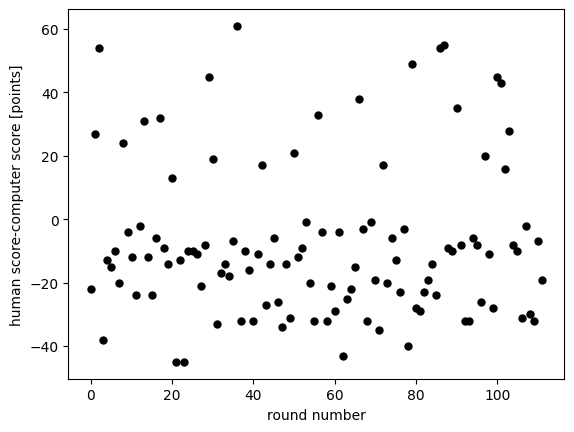

In [32]:
#slect only human
df2=df[df.acting_player==0].groupby(df.round_number).max()
plt.plot(df2.round_number,df2.score_self-df2.score_other,'o',ms=5,color='black') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("round number")
plt.ylabel("human score-computer score [points]")

In the results above it is visible that the human wins (or below 0) partly with only a small adventage while that never happends for then computer. That is because the computer finhss first, when the computer win he has no only the lowest number of points but also the points of the human are doubled causing that there is a gap just over zero. 

Text(0.5, 0, 'human score-computer score [points]')

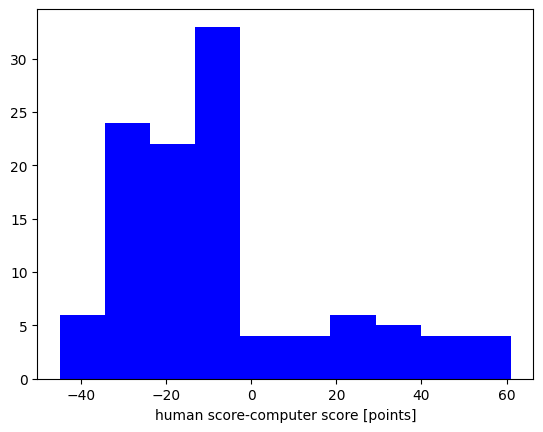

In [33]:
#df2.score_self.plot(kind='hist')
#df2.score_other.plot(kind='hist')
plt.hist(df2.score_self-df2.score_other,color='blue') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("number of occurancies")
plt.xlabel("human score-computer score [points]")

In [34]:
#columns used in model 
level1_2players_columns=np.loadtxt("xgb_model1_column2.txt")
#the score columns need to be marked back 
sel1=np.copy(level1_2players_columns)
#the score columns set to 1 since need to be output
sel1[49:51]=1

#model file needed to run (is in included in function library not needed here but is so more visible) 
level1_2players_model = XGBRegressor()
level1_2players_model.load_model("xgb_model2.json")
level1_2players_modelb = XGBRegressor()
level1_2players_modelb.load_model("xgb_model3.json")
level1_2players_modelc = XGBRegressor()
level1_2players_modelc.load_model("xgb_model4.json")
print(len(level1_2players_columns),sum(level1_2players_columns))
#get prediction
for_xgb=np.zeros((int(sum(level1_2players_columns)),df.shape[0]))
counter=0
for i in range(len(level1_2players_columns)):
    if level1_2players_columns[i]==1:
        for_xgb[counter]=df.iloc[:,i]
        counter+=1
print(counter)   
print(for_xgb.shape)
print(for_xgb)

51 30.0
30
(30, 3565)
[[ 4.  5. -1. ...  7.  6. 11.]
 [20. -1. 20. ... 20. -1. 20.]
 [20. 20. 20. ... 20.  2. 20.]
 ...
 [30.  2. 30. ... 12. 11.  6.]
 [ 4.  0.  7. ...  4. 11.  4.]
 [ 5. -1.  8. ...  6. 20. 12.]]


In [35]:
res=level1_2players_model.predict(for_xgb.T)
resb=level1_2players_modelb.predict(for_xgb.T)

Text(0.5, 1.0, 'xgboost fitted to random acting computer')

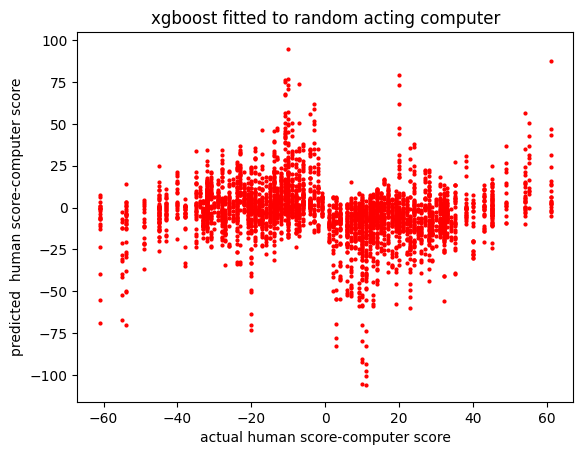

In [36]:
plt.plot( df.score_self-df.score_other,res,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to random acting computer")

Text(0.5, 1.0, 'xgboost fitted to improved acting computer')

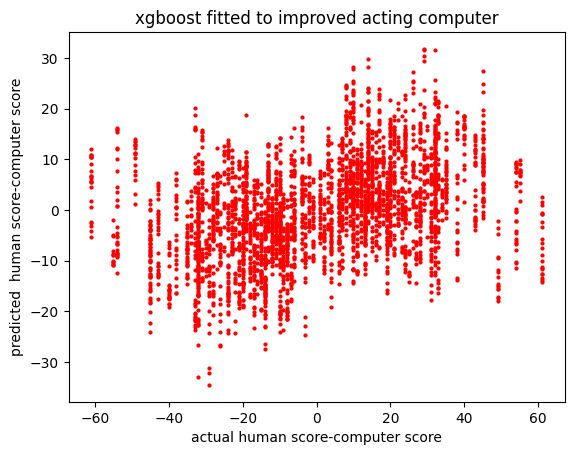

In [37]:
plt.plot( df.score_self-df.score_other,resb,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to improved acting computer")

The model fitted to the improbved acting computer looks clearly better, there is a positivecorrelation visible while there is nothing or a negative correlation visible for the other. 

In [38]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781


The prediction is rather bad for the xgboost model fitted to the random data, when subtracting it from the score increase the standard deviation instead to decrease it as when it worked as it is the case on computer data. The median deviation looks better, there the deviation reduces slightly, thus just a few cases are really badly predicted. 

The similar xgbmodel fitted to improved computer actions fairs better, it reduces most measures of performances

Other ideas use both xgb (more feature engeering on it, change to vanished card n explict feature, likely small N cause a problem) for the next iteration. deep learning only if it is better on the training data.

If that does not decrease predictions, then train on human data, more simple model needed, maybe xgb or linear with good features. 

In [39]:
df['own_n_closed']=df.loc[:,'own_cards_0':'own_cards_11'][df.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df['own_n_open']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=30) & (df.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df['own_max']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df['own_sum']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df['other_player_n_closed']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][df.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df['other_player_n_open']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)
df['other_player_max']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df['other_player_sum']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)


In [40]:
#feature negering to better columns
newcolumns=['open_pile_card', 'own_n_closed', 'own_n_open', 'own_max',
       'own_sum', 'other_player_n_closed', 'other_player_n_open',
       'other_player_max', 'other_player_sum', 'action_take_open', 'action_discard',
       'discard_value','numeric_player_card', 'score_self',
       'score_other', 'round_number']
df2=df.loc[:,newcolumns]
#excloding target columns and round
df3=df.loc[:,newcolumns[0:13]]

In [41]:
resc=level1_2players_modelc.predict(df3)

Text(0.5, 1.0, 'xgboost on feature engering fitted to improved acting computer')

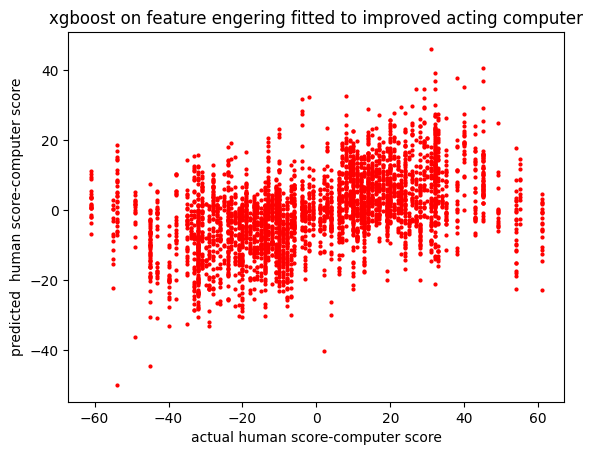

In [42]:
plt.plot( df.score_self-df.score_other,resc,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost on feature engering fitted to improved acting computer")

In [43]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")
print("Model 3")
print(f"standard deviation data-model {np.round(np.std(resc-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resc-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781
Model 3
standard deviation data-model 22.224
median deviation data 16.108


The two xgboost models based on the same data perform somewhat similar, the one using the data directly has a smaller median deviation, the other a smaller deviation deviation. 

In [34]:
feature_train2,feature_test2, target_train2,target_test2=split_test(df2.iloc[:,0:13],df2.score_self-df2.score_other, df2.iloc[:,15],0.6)

2139
2148


In [35]:
ar=do_xgb(feature_train2, target_train2, feature_test2, target_test2,6,reg=0)
print(ar)

xgb took 0.1422 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 27.4042 points
standard deviation of prediction-train 5.689 points
[ 0.          6.          5.68904372 27.40418715]


In [36]:
loop_reg(feature_train2, target_train2, feature_test2, target_test2,4,1,1.414,25,"xgb_human1_maxd04.txt")

doing case 0
xgb took 0.1002 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.7528 points
standard deviation of prediction-train 13.7311 points
doing case 1
xgb took 0.0499 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.8047 points
standard deviation of prediction-train 13.9161 points
doing case 2
xgb took 0.0668 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 26.0911 points
standard deviation of prediction-train 13.7356 points
doing case 3
xgb took 0.0577 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.9185 points
standard deviation of prediction-train 13.9202 points
doing case 4
xgb took 0.0498 seconds
standard deviation of test 25.9178 points
s

In [37]:
hum1=np.loadtxt("xgb_human1_maxd01.txt")
hum2=np.loadtxt("xgb_human1_maxd02.txt")
hum3=np.loadtxt("xgb_human1_maxd03.txt")
hum4=np.loadtxt("xgb_human1_maxd04.txt")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum1[3]),4)} of max-depth=1")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum2[3]),4)} of max-depth=2")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum3[3]),4)} of max-depth=3")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum4[3]),4)} of max-depth=4")

minimum standard deviation of (prediction-test data) 23.4487 of max-depth=1
minimum standard deviation of (prediction-test data) 23.4124 of max-depth=2
minimum standard deviation of (prediction-test data) 23.5616 of max-depth=3
minimum standard deviation of (prediction-test data) 23.7237 of max-depth=4


Text(0, 0.5, 'standard deviation of data-prediction [points]')

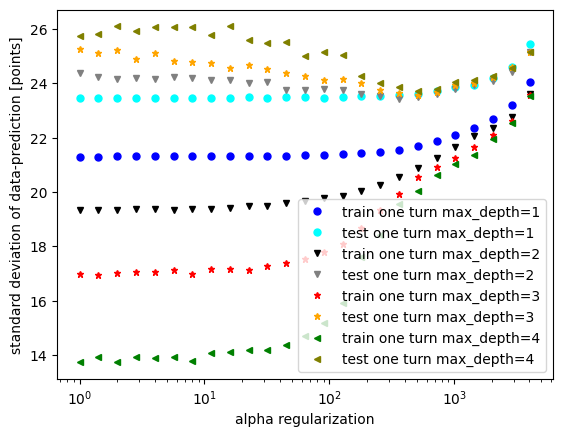

In [40]:
plt.plot(hum1[0],hum1[2],'o',ms=5,color='blue',label='train one turn max_depth=1') 
plt.plot(hum1[0],hum1[3],'o',ms=5,color='cyan',label='test one turn max_depth=1')
plt.plot(hum2[0],hum2[2],'v',ms=5,color='black',label='train one turn max_depth=2') 
plt.plot(hum2[0],hum2[3],'v',ms=5,color='gray',label='test one turn max_depth=2')
plt.plot(hum3[0],hum3[2],'*',ms=5,color='red',label='train one turn max_depth=3') 
plt.plot(hum3[0],hum3[3],'*',ms=5,color='orange',label='test one turn max_depth=3')
plt.plot(hum4[0],hum4[2],'<',ms=5,color='green',label='train one turn max_depth=4') 
plt.plot(hum4[0],hum4[3],'<',ms=5,color='olive',label='test one turn max_depth=4')
plt.legend(loc="best")
plt.xscale("log")
#plt.ylim(55,65)
plt.xlabel("alpha regularization")
plt.ylabel("standard deviation of data-prediction [points]")

Taring an xgboost model on the human is worse in the prediction than both models trained on advanced computer settings. 

I could explore more complicated models but could also first implement the otehr xgbbosst, espeically the one
without feature engering needs just a different input file as name. 

In [41]:
#check how model in actual application fares
#linear regression on each action option separately?  a lot of work and seem not machine learning
print(df2)
dftake=df2[df2.action_take_open=1]

      open_pile_card  own_n_closed  own_n_open  own_max  own_sum  \
0                4.0            10           2      8.0     13.0   
1                5.0            10           2      1.0      0.0   
2               -1.0            10           2      8.0     12.0   
3                8.0            10           2      2.0      3.0   
4                2.0            10           2      4.0      3.0   
...              ...           ...         ...      ...      ...   
3560            10.0             2          10     12.0     28.0   
3561            12.0             1          11      8.0     41.0   
3562             7.0             2          10      6.0     22.0   
3563             6.0             1           8      8.0     24.0   
3564            11.0             2          10     12.0     28.0   

      other_player_n_closed  other_player_n_open  other_player_max  \
0                        10                    2               1.0   
1                        10                

In [48]:
print(level1_2players_model.feature_importances_.shape,df.shape)
print(level1_2players_modelb.feature_importances_)

(30,) (3565, 60)
[0.20022598 0.00963422 0.11840304 0.00660788 0.01313902 0.0138765
 0.00815738 0.0077707  0.00912716 0.00465302 0.013208   0.03226249
 0.01348601 0.01038121 0.12892811 0.01242334 0.00744092 0.01283619
 0.00913652 0.00782426 0.0077482  0.00451147 0.01120893 0.02889716
 0.01112024 0.153542   0.00087686 0.00638651 0.12962395 0.00656274]


In [61]:
columns=['open_pile_card']
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card')              
print(columns)
print(len(columns))

['open_pile_card', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card']
30


fitting random data
open_pile_card has importance 0.0117
action_take_open has importance 0.0658
discard_value has importance 0.0133
id_player_card has importance 0.0079
fitting level 1 data
open_pile_card has importance 0.2002
own_cards_1 has importance 0.1184
own_cards_10 has importance 0.0323
other_player_cards_1 has importance 0.1289
other_player_cards_10 has importance 0.0289
action_take_open has importance 0.1535
id_player_card has importance 0.1296


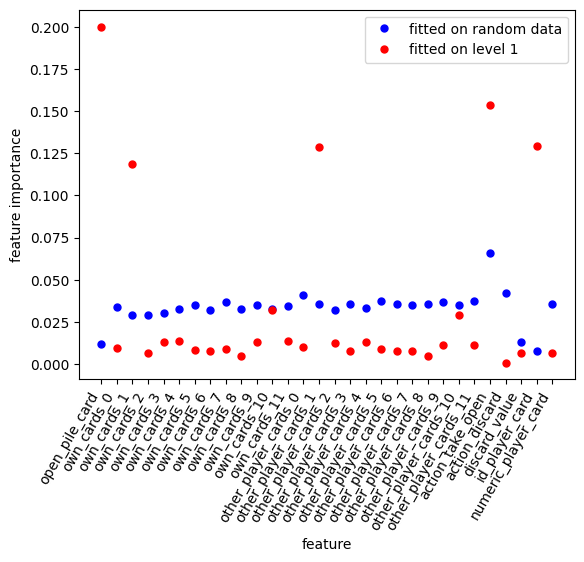

In [68]:
plt.plot(columns[0:30],level1_2players_model.feature_importances_,'o',ms=5,color='blue',label='fitted on random data') 
plt.plot(columns[0:30],level1_2players_modelb.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=60, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting random data")
for i in range(30):
    if abs(level1_2players_model.feature_importances_[i]-np.median(level1_2players_model.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_model.feature_importances_[i],4)))
 
print("fitting level 1 data")
for i in range(30):
    if abs(level1_2players_modelb.feature_importances_[i]-np.median(level1_2players_modelb.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_modelb.feature_importances_[i],4)))
    

In the first fit which is done on the random data the vast majority features has about the same importance. 
Less importance has the open card, the value of the discarded card and least the id of the choosen card. The only feature with larger importance is the whether the open card is used. 
That seems plausible, most are equally importance, the id is truly less imprortant usually and whether the open card has a lot of importance on the following actions.

In contrast a lot is different for the model fitted to level 1 (which has less depth and fits more correlated data), most have nearlz no importance. Take action stazs important but beides also not so plasuible also 4 player cards (that both player contribute the same can be understood since who is who changes from turn to turn) and the id of used card. That the value of the open is used is plausible, since it matters at least closer to the end of the game. 
Still overall it makes less sense, and thus it is not surprising that implementing it does not lead to improvements. 

fitting level 1 data with features
open_pile_card has importance 0.0178
own_n_closed has importance 0.2736
own_n_open has importance 0.0091
own_sum has importance 0.1182
other_player_n_closed has importance 0.2667
other_player_n_open has importance 0.0131
other_player_sum has importance 0.1163
action_take_open has importance 0.0199
action_discard has importance 0.0141
numeric_player_card has importance 0.0582


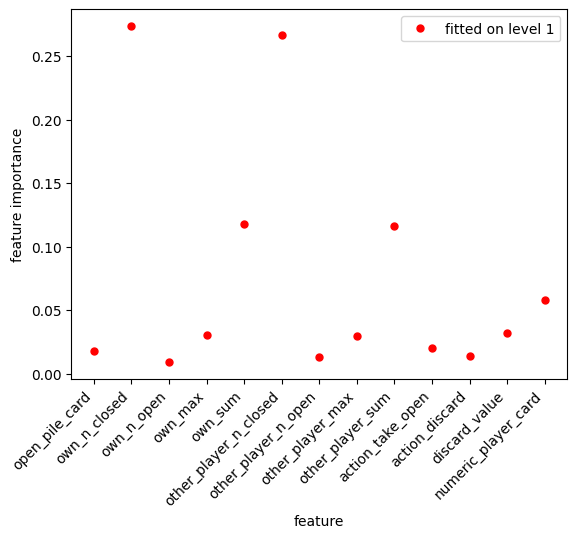

In [71]:
plt.plot(newcolumns[0:13],level1_2players_modelc.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=45, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting level 1 data with features")
for i in range(13):
    if abs(level1_2players_modelc.feature_importances_[i]-np.median(level1_2players_modelc.feature_importances_))>0.01:
        print(newcolumns[i]+" has importance "+str(round(level1_2players_modelc.feature_importances_[i],4)))
    

Here it looks more plausibel again. Most important are the sum of the card values and how many or open, since the the differential score is approximate: own_sum+own_n_closed*avg_value-(other_player_sum+other_player_n_closed*avg_value)

The next important is the player card given, which is the next important, because it always matters.

That n_open has the smallest importance makes sense since it is just reverse of closed always besides for vanishing cards, and it is not expected that those importance can be discovered here.  